In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,1.0,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.88,Yes
1,2,15647311,Hill,608.0,Spain,Female,1.0,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.58,No
2,3,15619304,Onio,502.0,France,Female,1.0,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.57,Yes
3,4,15701354,Boni,699.0,France,Female,1.0,39.0,1.0,1.0,0.00,2.0,0.0,0.0,0.0,?,No
4,5,15737888,Mitchell,850.0,Spain,Female,1.0,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.1,No
5,6,15574012,Chu,645.0,Spain,Male,0.0,44.0,1.0,8.0,113755.78,2.0,1.0,1.0,0.0,149756.71,Yes
6,7,15592531,Bartlett,822.0,France,Male,0.0,-1.0,1.0,7.0,0.00,2.0,0.0,1.0,1.0,10062.8,No
7,8,15656148,Obinna,376.0,Germany,Female,1.0,29.0,1.0,4.0,115046.74,4.0,1.0,1.0,0.0,119346.88,Yes
8,9,15792365,He,501.0,France,Male,0.0,44.0,1.0,4.0,142051.07,2.0,0.0,0.0,1.0,74940.5,No
9,10,15592389,H?,684.0,France,Male,0.0,27.0,1.0,2.0,134603.88,1.0,0.0,1.0,1.0,71725.73,No


Task 1: 
Question 1
what is the proportion of customers who exited and stopped using the banking services?

In [4]:
#answer 
print(df['Exited'].describe())
print(df['Exited'].value_counts())

count     10000
unique        2
top          No
freq       7963
Name: Exited, dtype: object
No     7963
Yes    2037
Name: Exited, dtype: int64


There is 2037 people exited from the data base

Task 1:
Question 2
The dataset may include irrelevant and redundant varibles. What varibles did you include in the analysis and what were their roles and measurement leve lset? Justify your choice

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [6]:
# drop those becuase do need them in prediciton
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
#drop gender becuse gender and sex are the same thing
df.drop(['Gender'], axis=1, inplace = True)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9963 non-null   float64
 1   Geography             9963 non-null   object 
 2   Sex                   9805 non-null   float64
 3   Age                   9963 non-null   float64
 4   CurrentWorkingStatus  9963 non-null   float64
 5   Tenure                9963 non-null   float64
 6   Balance               9963 non-null   float64
 7   NumOfProducts         9859 non-null   float64
 8   ComplaintsLodged      9963 non-null   float64
 9   HasCrCard             9963 non-null   float64
 10  IsActiveMember        9963 non-null   float64
 11  EstimatedSalary       9896 non-null   object 
 12  Exited                10000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1015.8+ KB
None


I droped those becuase those are not needed for predciton of exited. dropped gender because sex and gender means the same thing

Task 1: Question 3: Did you have to fix any data quality problems? Detail them. Apply the imputation methods to the variables that need it. List the variables that needed it. justify your choice of imputation if needed

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9963 non-null   float64
 1   Geography             9963 non-null   object 
 2   Sex                   9805 non-null   float64
 3   Age                   9963 non-null   float64
 4   CurrentWorkingStatus  9963 non-null   float64
 5   Tenure                9963 non-null   float64
 6   Balance               9963 non-null   float64
 7   NumOfProducts         9859 non-null   float64
 8   ComplaintsLodged      9963 non-null   float64
 9   HasCrCard             9963 non-null   float64
 10  IsActiveMember        9963 non-null   float64
 11  EstimatedSalary       9896 non-null   object 
 12  Exited                10000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1015.8+ KB
None


In [10]:
#first step is to check null values and see how to deal with them
df.isnull().sum()

CreditScore              37
Geography                37
Sex                     195
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         104
Exited                    0
dtype: int64

In [11]:
null_columns = df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns])

      CreditScore Geography  Sex   Age  CurrentWorkingStatus  Tenure  \
22            NaN       NaN  NaN   NaN                   NaN     NaN   
23            NaN       NaN  NaN   NaN                   NaN     NaN   
24            NaN       NaN  NaN   NaN                   NaN     NaN   
25            NaN       NaN  NaN   NaN                   NaN     NaN   
26            NaN       NaN  NaN   NaN                   NaN     NaN   
...           ...       ...  ...   ...                   ...     ...   
8987        766.0     Spain  NaN  36.0                   1.0     5.0   
8988        634.0    France  NaN  37.0                   1.0     5.0   
8989        640.0   Germany  NaN  31.0                   1.0    10.0   
8990        784.0   Germany  NaN  28.0                   1.0     2.0   
8991        547.0   Germany  NaN  42.0                   1.0     1.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
22          NaN            NaN               NaN        

creditsore, georaphy, age, Currentworkingstatus, tenure, balance, complaintslodged, hascrcard, and isactivemember has the same amount nulls. This most likely is becase those users did not fill out their infor correctly. drop them and caulate the mean does the same thing, in this cause we decided to drop them

In [12]:
#df = df.dropna(subset=["Age"])
mask = df['Age'] < 1
df.loc[mask, 'Age'] = np.nan
df.loc[mask, 'Age'].count()

0

In [13]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

38.92226574269358
37.0
0    37.0
dtype: float64


In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df.isnull().sum()

CreditScore              37
Geography                37
Sex                     195
Age                       0
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         104
Exited                    0
dtype: int64

In [16]:
mask = df['CreditScore'] < 1
df.loc[mask, 'CreditScore'].count() #CreditScore is good

0

In [17]:
print(df['Geography'].unique()) #Geo is good

['France' 'Spain' 'Germany' 'DE' nan 'ES' 'FR']


In [18]:
print(df['Sex'].unique()) #There is no way to guess the person sex, so drop the sex that we dont know

[ 1.  0. nan]


In [19]:
df = df.dropna(subset=["Sex"])

In [20]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [21]:
mask = df['Balance'] < 1
df.loc[mask, 'Balance'].count() #what the fuck do I do with this shit?

3561

In [22]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [23]:
print(df[df["NumOfProducts"].isnull()][null_columns]) #a 1 years old baby dont have any salary dorp

      CreditScore Geography  Sex   Age  CurrentWorkingStatus  Tenure  \
86          750.0     Spain  0.0  22.0                   1.0     3.0   
87          729.0    France  0.0  30.0                   1.0     9.0   
88          646.0    France  1.0  46.0                   1.0     4.0   
89          635.0        DE  1.0  28.0                   1.0     3.0   
90          647.0     Spain  1.0  44.0                   1.0     5.0   
...           ...       ...  ...   ...                   ...     ...   
3816        664.0    France  1.0  31.0                   1.0     9.0   
3817        682.0   Germany  1.0  29.0                   1.0     6.0   
3818        725.0    France  1.0  44.0                   1.0    10.0   
3819        553.0   Germany  0.0  46.0                   1.0     3.0   
3820        576.0    France  0.0  39.0                   1.0     9.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
86    121681.82            NaN               1.0        

In [24]:
print(df['NumOfProducts'].mean())
print(df['NumOfProducts'].median())
print(df['NumOfProducts'].mode())

1.5319039274301618
1.0
0    1.0
dtype: float64


In [25]:
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)

In [26]:
df.isnull().sum()

CreditScore              0
Geography                0
Sex                      0
Age                      0
CurrentWorkingStatus     0
Tenure                   0
Balance                  0
NumOfProducts            0
ComplaintsLodged         0
HasCrCard                0
IsActiveMember           0
EstimatedSalary         67
Exited                   0
dtype: int64

In [27]:
df['EstimatedSalary'].describe()

count     9738
unique    9674
top          ?
freq        64
Name: EstimatedSalary, dtype: object

In [28]:
df1 = df

In [29]:
df1.isnull().sum()

CreditScore              0
Geography                0
Sex                      0
Age                      0
CurrentWorkingStatus     0
Tenure                   0
Balance                  0
NumOfProducts            0
ComplaintsLodged         0
HasCrCard                0
IsActiveMember           0
EstimatedSalary         67
Exited                   0
dtype: int64

In [30]:
df1['EstimatedSalary'].apply(lambda x: np.nan if x == '?' else x) 
df['EstimatedSalary'] = df['EstimatedSalary'].apply(lambda x: np.nan if x == '?' else x) 

In [31]:
df1.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts             0
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary         131
Exited                    0
dtype: int64

In [32]:
df1 = df1.dropna(subset=["EstimatedSalary"])

In [33]:
df1.isnull().sum()

CreditScore             0
Geography               0
Sex                     0
Age                     0
CurrentWorkingStatus    0
Tenure                  0
Balance                 0
NumOfProducts           0
ComplaintsLodged        0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
dtype: int64

In [34]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9674 non-null   float64
 1   Geography             9674 non-null   object 
 2   Sex                   9674 non-null   float64
 3   Age                   9674 non-null   float64
 4   CurrentWorkingStatus  9674 non-null   float64
 5   Tenure                9674 non-null   float64
 6   Balance               9674 non-null   float64
 7   NumOfProducts         9674 non-null   float64
 8   ComplaintsLodged      9674 non-null   float64
 9   HasCrCard             9674 non-null   float64
 10  IsActiveMember        9674 non-null   float64
 11  EstimatedSalary       9674 non-null   object 
 12  Exited                9674 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.0+ MB
None


In [35]:
df1['EstimatedSalary'] = df1['EstimatedSalary'].astype(float)

<ipython-input-35-79b2996b8c11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EstimatedSalary'] = df1['EstimatedSalary'].astype(float)


In [36]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9674 non-null   float64
 1   Geography             9674 non-null   object 
 2   Sex                   9674 non-null   float64
 3   Age                   9674 non-null   float64
 4   CurrentWorkingStatus  9674 non-null   float64
 5   Tenure                9674 non-null   float64
 6   Balance               9674 non-null   float64
 7   NumOfProducts         9674 non-null   float64
 8   ComplaintsLodged      9674 non-null   float64
 9   HasCrCard             9674 non-null   float64
 10  IsActiveMember        9674 non-null   float64
 11  EstimatedSalary       9674 non-null   float64
 12  Exited                9674 non-null   object 
dtypes: float64(11), object(2)
memory usage: 1.0+ MB
None


In [37]:
df1['Sex']

0       1.0
1       1.0
2       1.0
4       1.0
5       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    0.0
9999    1.0
Name: Sex, Length: 9674, dtype: float64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9674 non-null   float64
 1   Geography             9674 non-null   object 
 2   Sex                   9674 non-null   float64
 3   Age                   9674 non-null   float64
 4   CurrentWorkingStatus  9674 non-null   float64
 5   Tenure                9674 non-null   float64
 6   Balance               9674 non-null   float64
 7   NumOfProducts         9674 non-null   float64
 8   ComplaintsLodged      9674 non-null   float64
 9   HasCrCard             9674 non-null   float64
 10  IsActiveMember        9674 non-null   float64
 11  EstimatedSalary       9674 non-null   float64
 12  Exited                9674 non-null   object 
dtypes: float64(11), object(2)
memory usage: 1.0+ MB


In [39]:
df1['Sex'] = df1['Sex'].astype('category')

<ipython-input-39-5276929bb3a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'] = df1['Sex'].astype('category')


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           9674 non-null   float64 
 1   Geography             9674 non-null   object  
 2   Sex                   9674 non-null   category
 3   Age                   9674 non-null   float64 
 4   CurrentWorkingStatus  9674 non-null   float64 
 5   Tenure                9674 non-null   float64 
 6   Balance               9674 non-null   float64 
 7   NumOfProducts         9674 non-null   float64 
 8   ComplaintsLodged      9674 non-null   float64 
 9   HasCrCard             9674 non-null   float64 
 10  IsActiveMember        9674 non-null   float64 
 11  EstimatedSalary       9674 non-null   float64 
 12  Exited                9674 non-null   object  
dtypes: category(1), float64(10), object(2)
memory usage: 992.1+ KB


In [41]:
print(df1['Sex'].head(5))

0    1.0
1    1.0
2    1.0
4    1.0
5    0.0
Name: Sex, dtype: category
Categories (2, float64): [0.0, 1.0]


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           9674 non-null   float64 
 1   Geography             9674 non-null   object  
 2   Sex                   9674 non-null   category
 3   Age                   9674 non-null   float64 
 4   CurrentWorkingStatus  9674 non-null   float64 
 5   Tenure                9674 non-null   float64 
 6   Balance               9674 non-null   float64 
 7   NumOfProducts         9674 non-null   float64 
 8   ComplaintsLodged      9674 non-null   float64 
 9   HasCrCard             9674 non-null   float64 
 10  IsActiveMember        9674 non-null   float64 
 11  EstimatedSalary       9674 non-null   float64 
 12  Exited                9674 non-null   object  
dtypes: category(1), float64(10), object(2)
memory usage: 992.1+ KB


In [43]:
exited_map = {'Yes':0, 'No': 1}

In [44]:
df2 = df1

In [45]:
df2['Exited'] = df['Exited'].map(exited_map)

<ipython-input-45-7f597a3165c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Exited'] = df['Exited'].map(exited_map)


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           9674 non-null   float64 
 1   Geography             9674 non-null   object  
 2   Sex                   9674 non-null   category
 3   Age                   9674 non-null   float64 
 4   CurrentWorkingStatus  9674 non-null   float64 
 5   Tenure                9674 non-null   float64 
 6   Balance               9674 non-null   float64 
 7   NumOfProducts         9674 non-null   float64 
 8   ComplaintsLodged      9674 non-null   float64 
 9   HasCrCard             9674 non-null   float64 
 10  IsActiveMember        9674 non-null   float64 
 11  EstimatedSalary       9674 non-null   float64 
 12  Exited                9674 non-null   int64   
dtypes: category(1), float64(10), int64(1), object(1)
memory usage: 992.1+ KB


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           9674 non-null   float64 
 1   Geography             9674 non-null   object  
 2   Sex                   9674 non-null   category
 3   Age                   9674 non-null   float64 
 4   CurrentWorkingStatus  9674 non-null   float64 
 5   Tenure                9674 non-null   float64 
 6   Balance               9674 non-null   float64 
 7   NumOfProducts         9674 non-null   float64 
 8   ComplaintsLodged      9674 non-null   float64 
 9   HasCrCard             9674 non-null   float64 
 10  IsActiveMember        9674 non-null   float64 
 11  EstimatedSalary       9674 non-null   float64 
 12  Exited                9674 non-null   int64   
dtypes: category(1), float64(10), int64(1), object(1)
memory usage: 992.1+ KB


In [48]:
df2['Exited'] = df2['Exited'].astype('category')

<ipython-input-48-76a3fd07d2f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Exited'] = df2['Exited'].astype('category')


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           9674 non-null   float64 
 1   Geography             9674 non-null   object  
 2   Sex                   9674 non-null   category
 3   Age                   9674 non-null   float64 
 4   CurrentWorkingStatus  9674 non-null   float64 
 5   Tenure                9674 non-null   float64 
 6   Balance               9674 non-null   float64 
 7   NumOfProducts         9674 non-null   float64 
 8   ComplaintsLodged      9674 non-null   float64 
 9   HasCrCard             9674 non-null   float64 
 10  IsActiveMember        9674 non-null   float64 
 11  EstimatedSalary       9674 non-null   float64 
 12  Exited                9674 non-null   category
dtypes: category(2), float64(10), object(1)
memory usage: 926.0+ KB


In [50]:
df2

,CreditScore,Geography,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,1.0,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.88,0
1,608.0,Spain,1.0,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.58,1
2,502.0,France,1.0,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.57,0
4,850.0,Spain,1.0,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.10,1
5,645.0,Spain,0.0,44.0,1.0,8.0,113755.78,2.0,1.0,1.0,0.0,149756.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,0.0,39.0,1.0,5.0,0.00,2.0,0.0,1.0,0.0,96270.64,1
9996,516.0,France,0.0,35.0,1.0,10.0,57369.61,1.0,0.0,1.0,1.0,101699.77,1
9997,709.0,France,1.0,36.0,1.0,7.0,0.00,1.0,1.0,0.0,1.0,42085.58,0
9998,772.0,Germany,0.0,42.0,1.0,3.0,75075.31,2.0,1.0,1.0,0.0,92888.52,0


In [52]:
df2['IsActiveMember'] = df2['IsActiveMember'].astype('category')

<ipython-input-52-14fecefe4a98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['IsActiveMember'] = df2['IsActiveMember'].astype('category')


In [53]:
df2['HasCrCard'] = df2['HasCrCard'].astype('category')

<ipython-input-53-184934321d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HasCrCard'] = df2['HasCrCard'].astype('category')


In [54]:
df2['ComplaintsLodged'] = df2['ComplaintsLodged'].astype('category')

<ipython-input-54-3a27ebefea22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ComplaintsLodged'] = df2['ComplaintsLodged'].astype('category')


In [55]:
df2['CurrentWorkingStatus'] = df2['CurrentWorkingStatus'].astype('category')

<ipython-input-55-92e1487cac5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CurrentWorkingStatus'] = df2['CurrentWorkingStatus'].astype('category')


In [57]:
df2.isnull().sum()

CreditScore             0
Geography               0
Sex                     0
Age                     0
CurrentWorkingStatus    0
Tenure                  0
Balance                 0
NumOfProducts           0
ComplaintsLodged        0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
dtype: int64

In [61]:
mask = df2['Balance'] < 1
df2.loc[mask, 'Balance'].count() #what the fuck do I do with this shit?
df2.loc[mask, 'Balance'] = np.nan

D:\ana\file\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
df2.isnull().sum()

CreditScore                0
Geography                  0
Sex                        0
Age                        0
CurrentWorkingStatus       0
Tenure                     0
Balance                 3510
NumOfProducts              0
ComplaintsLodged           0
HasCrCard                  0
IsActiveMember             0
EstimatedSalary            0
Exited                     0
dtype: int64

In [63]:
df2['Balance'].fillna(df['Balance'].mean(), inplace=True)

D:\ana\file\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [64]:
df2.isnull().sum()

CreditScore             0
Geography               0
Sex                     0
Age                     0
CurrentWorkingStatus    0
Tenure                  0
Balance                 0
NumOfProducts           0
ComplaintsLodged        0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
dtype: int64

D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


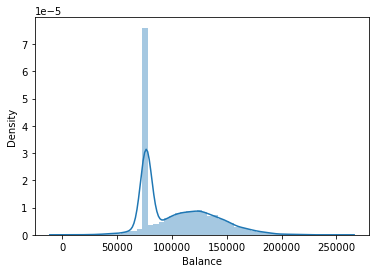

In [74]:
dg = sns.distplot(df2['Balance'].dropna())
plt.show()

In [76]:
df2['Geography'].unique()

array(['France', 'Spain', 'Germany', 'DE', 'ES', 'FR'], dtype=object)

In [77]:
geo_map = {'France':0, 'Spain': 1,'Germany':3, 'DE':4, 'ES':5, "FR":6}

In [78]:
df2['Geography'] = df2['Geography'].map(geo_map)

<ipython-input-78-5d774437fc6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Geography'] = df2['Geography'].map(geo_map)


In [79]:
df2

,CreditScore,Geography,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,1.0,42.0,1.0,2.0,76369.59169,1.0,1.0,1.0,1.0,101348.88,0
1,608.0,1,1.0,41.0,1.0,1.0,83807.86000,1.0,0.0,0.0,1.0,112542.58,1
2,502.0,0,1.0,42.0,1.0,8.0,159660.80000,3.0,1.0,1.0,0.0,113931.57,0
4,850.0,1,1.0,43.0,1.0,2.0,125510.82000,1.0,0.0,1.0,1.0,79084.10,1
5,645.0,1,0.0,44.0,1.0,8.0,113755.78000,2.0,1.0,1.0,0.0,149756.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,0.0,39.0,1.0,5.0,76369.59169,2.0,0.0,1.0,0.0,96270.64,1
9996,516.0,0,0.0,35.0,1.0,10.0,57369.61000,1.0,0.0,1.0,1.0,101699.77,1
9997,709.0,0,1.0,36.0,1.0,7.0,76369.59169,1.0,1.0,0.0,1.0,42085.58,0
9998,772.0,3,0.0,42.0,1.0,3.0,75075.31000,2.0,1.0,1.0,0.0,92888.52,0


In [81]:
y = df2['Exited']
X = df2.drop(['Exited'], axis=1)


In [82]:
rs = 10
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3,
 stratify=y, random_state=rs)

In [83]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [84]:
print("Train accuracy:", model.score(X_train, y_train))


Train accuracy: 1.0


In [85]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.9435067171891147


In [86]:
model = DecisionTreeClassifier( random_state=rs)
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.9435067171891147
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       591
           1       0.96      0.97      0.96      2312

    accuracy                           0.94      2903
   macro avg       0.92      0.91      0.91      2903
weighted avg       0.94      0.94      0.94      2903



In [88]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 7),
 'min_samples_leaf': range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9714960862501846
Test accuracy: 0.9686531174646917
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       591
           1       0.98      0.98      0.98      2312

    accuracy                           0.97      2903
   macro avg       0.96      0.95      0.95      2903
weighted avg       0.97      0.97      0.97      2903

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 40}


In [90]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 6),
 'min_samples_leaf': range(35, 45)}
cv = GridSearchCV(param_grid=params, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9714960862501846
Test accuracy: 0.9686531174646917
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       591
           1       0.98      0.98      0.98      2312

    accuracy                           0.97      2903
   macro avg       0.96      0.95      0.95      2903
weighted avg       0.97      0.97      0.97      2903

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 36}
